In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Yolları tanımlayalım
BASE_DIR = os.path.dirname(os.getcwd())
RAW_PATH = os.path.join(BASE_DIR, 'data', 'processed', 'wildfire_data.parquet')
CLEAN_PATH = os.path.join(BASE_DIR, 'data', 'processed', 'wildfire_data_clean.parquet')

print(" Dosyalar yükleniyor...")
df_raw = pd.read_parquet(RAW_PATH)
df_clean = pd.read_parquet(CLEAN_PATH)

print("-" * 50)
print(f" İLK HALİ (Raw): {df_raw.shape[0]} Satır, {df_raw.shape[1]} Sütun")
print(f" SON HALİ (Clean): {df_clean.shape[0]} Satır, {df_clean.shape[1]} Sütun")
print("-" * 50)

# Kolon İsimlerini Kıyaslayalım
print("\nEski Kolonlar:", df_raw.columns.tolist())
print("\nYeni Kolonlar (Bazıları):", df_clean.columns.tolist()[:10], "... ve diğerleri")

# Silinen Boş Satır Sayısını Hesaplayalım
diff = len(df_raw) - len(df_clean)
print(f"\n Silinen Boş Satır Sayısı: {diff} (Verinin %{diff/len(df_raw)*100:.4f}'ü)")

 Dosyalar yükleniyor...
--------------------------------------------------
 İLK HALİ (Raw): 1880465 Satır, 8 Sütun
 SON HALİ (Clean): 1880465 Satır, 21 Sütun
--------------------------------------------------

Eski Kolonlar: ['FIRE_YEAR', 'DISCOVERY_DATE', 'STAT_CAUSE_DESCR', 'LATITUDE', 'LONGITUDE', 'STATE', 'FIRE_SIZE', 'FIRE_SIZE_CLASS']

Yeni Kolonlar (Bazıları): ['LATITUDE', 'LONGITUDE', 'FIRE_SIZE', 'FIRE_SIZE_CLASS_ID', 'MONTH', 'DAY_OF_WEEK', 'MONTH_SIN', 'MONTH_COS', 'CAUSE_Arson', 'CAUSE_Campfire'] ... ve diğerleri

 Silinen Boş Satır Sayısı: 0 (Verinin %0.0000'ü)


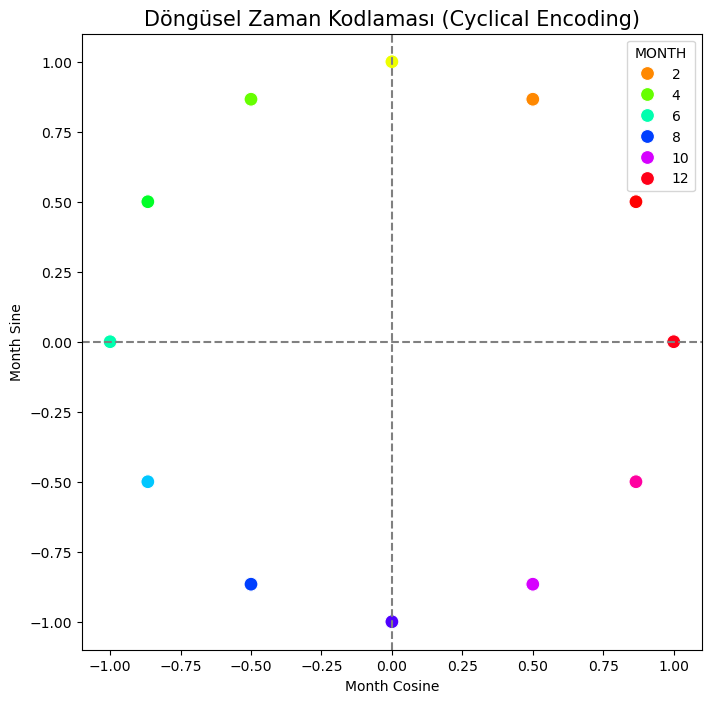

In [2]:
plt.figure(figsize=(8, 8))

# Scatter plot ile Sinüs ve Kosinüs değerlerini çizdirelim
sns.scatterplot(x='MONTH_COS', y='MONTH_SIN', data=df_clean.sample(1000), hue='MONTH', palette='hsv', s=100)

plt.title('Döngüsel Zaman Kodlaması (Cyclical Encoding)', fontsize=15)
plt.xlabel('Month Cosine')
plt.ylabel('Month Sine')
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')

plt.show()

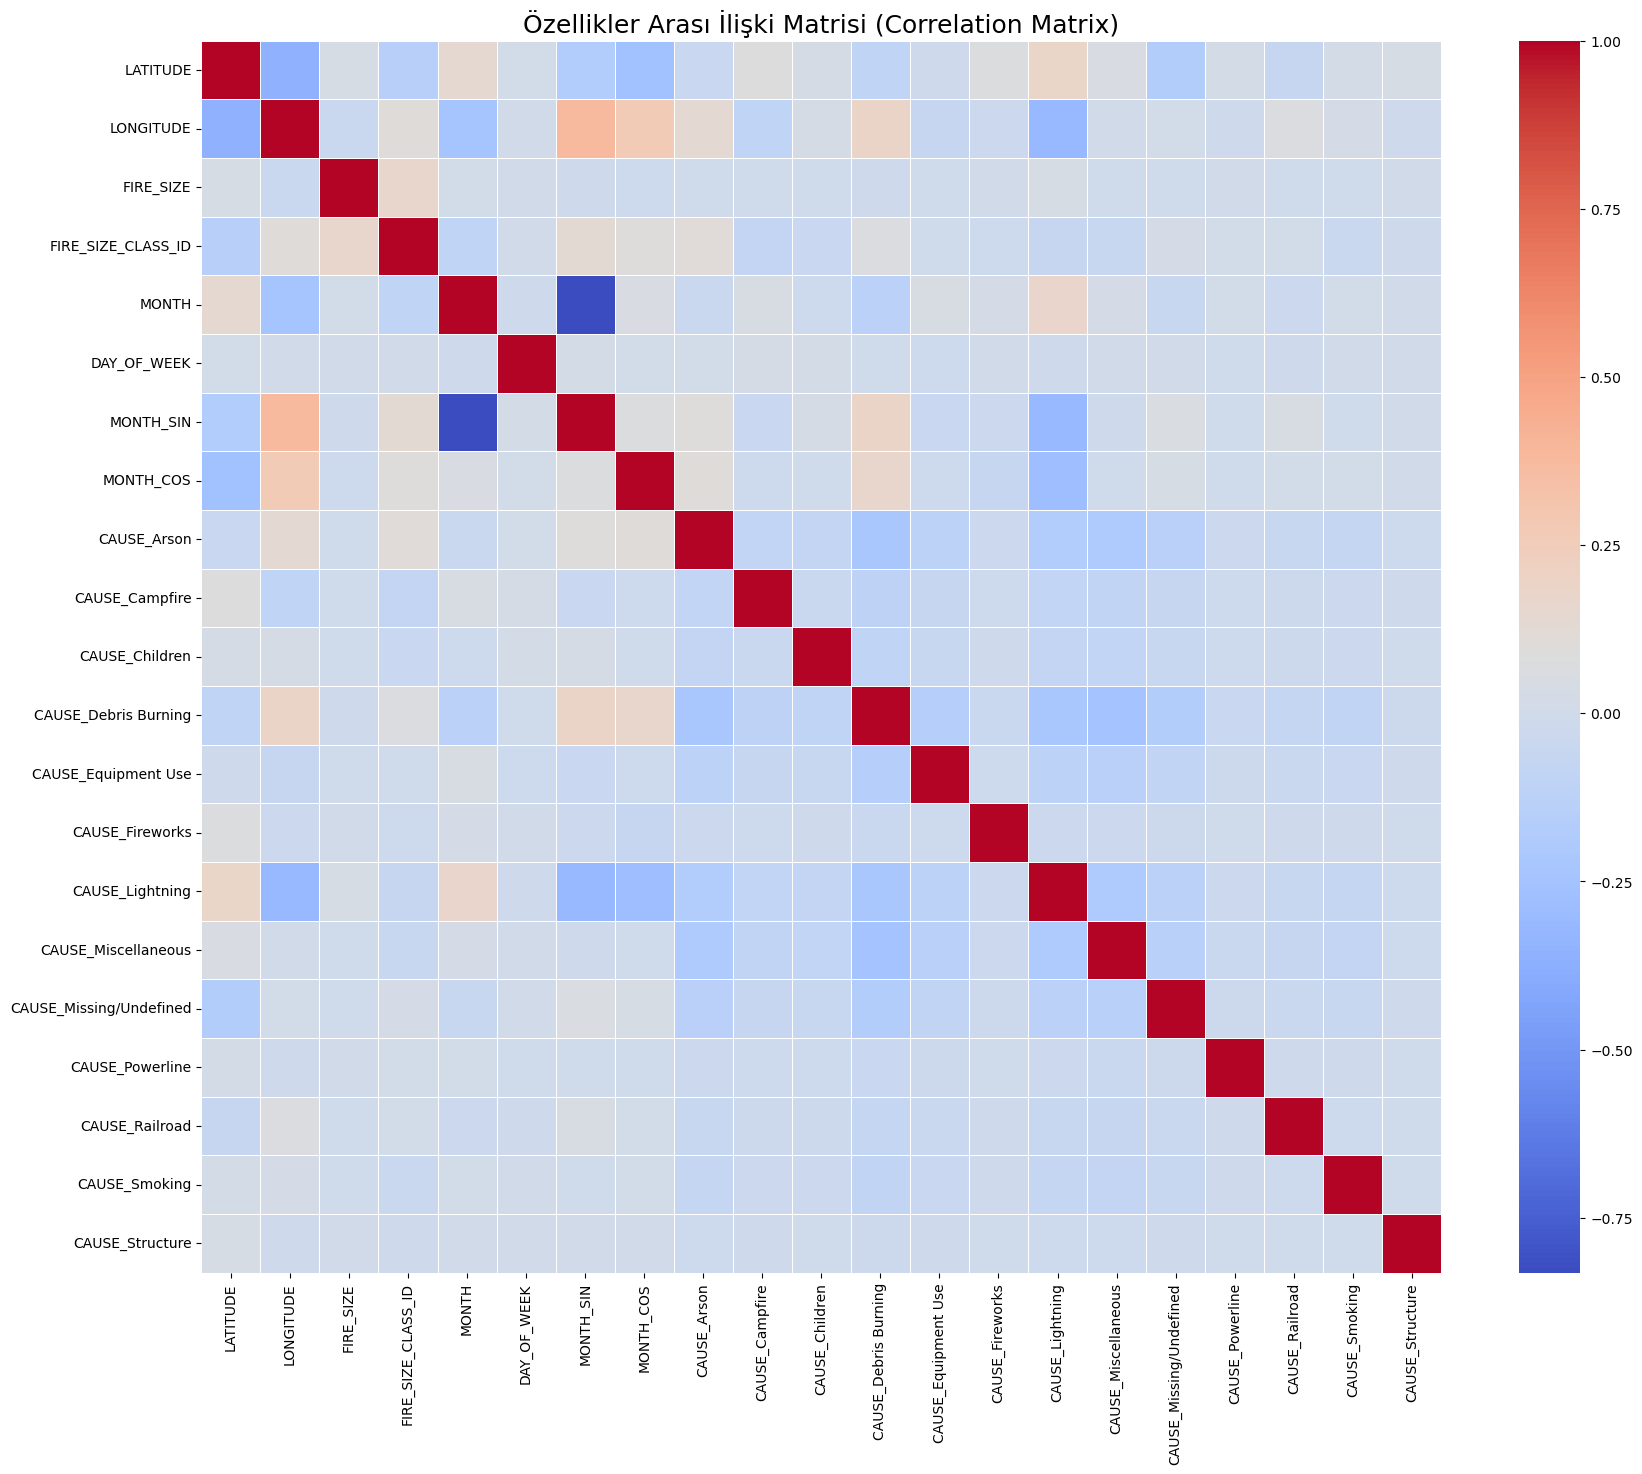

In [3]:
plt.figure(figsize=(20, 16))

# Sadece sayısal kolonları alalım
numeric_df = df_clean.select_dtypes(include=['float64', 'int64', 'int32', 'int16', 'int8'])

# Korelasyonu hesapla
corr = numeric_df.corr()

# Isı haritası 
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)

plt.title('Özellikler Arası İlişki Matrisi (Correlation Matrix)', fontsize=18)
plt.show()

/var/folders/g7/79160ktd5rz2zv_pl2fdc4xr0000gn/T/ipykernel_33657/2753584941.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cause_sums.values, y=cause_sums.index, palette='viridis')


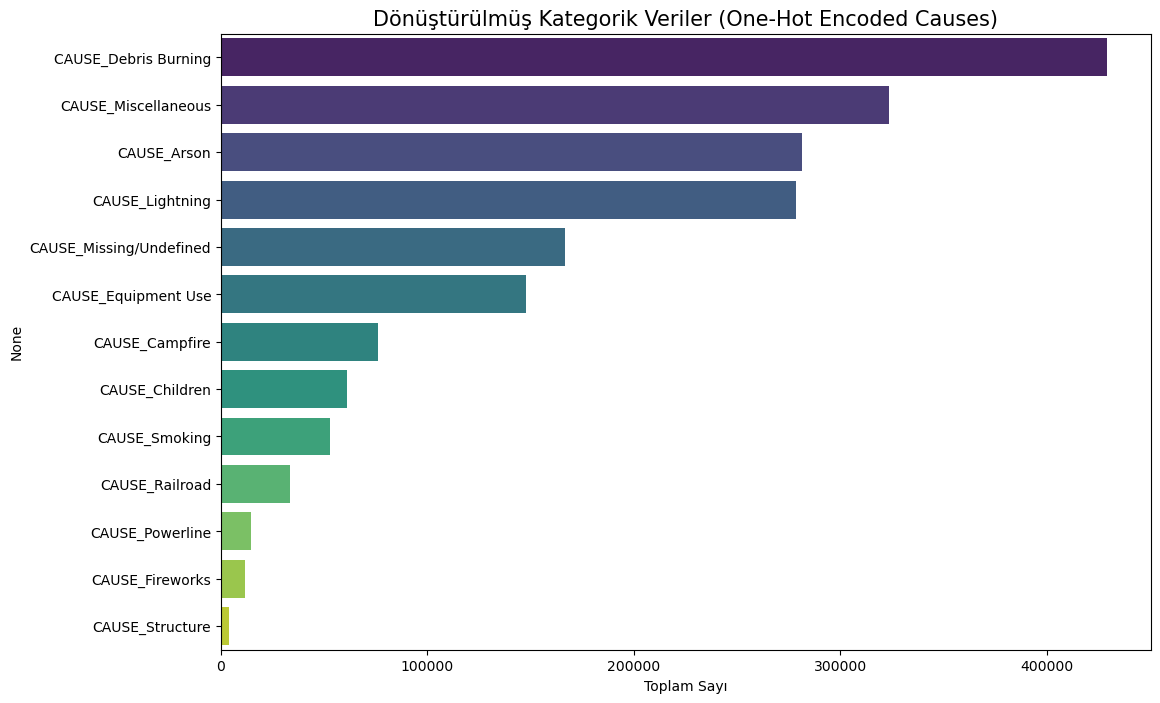

In [4]:
# One-Hot Encoded kolonları bulalım
cause_cols = [col for col in df_clean.columns if 'CAUSE_' in col]

# Toplamlarını alıp grafik çizelim 
cause_sums = df_clean[cause_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=cause_sums.values, y=cause_sums.index, palette='viridis')
plt.title('Dönüştürülmüş Kategorik Veriler (One-Hot Encoded Causes)', fontsize=15)
plt.xlabel('Toplam Sayı')
plt.show()

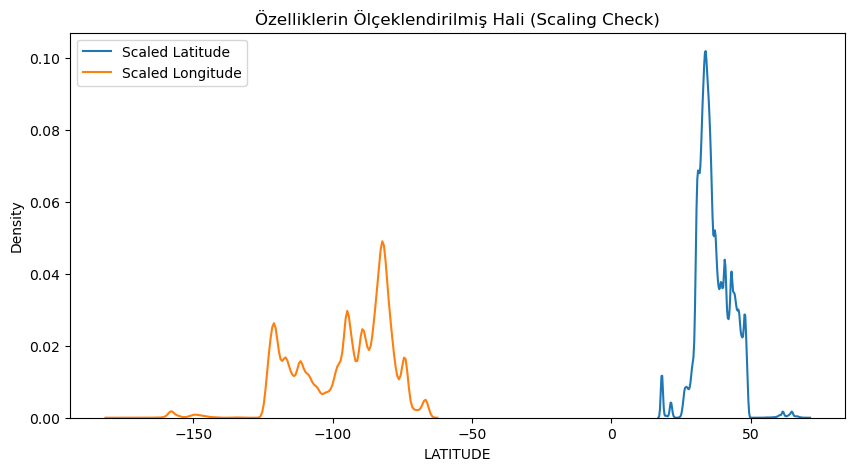

In [5]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df_clean['LATITUDE'], label='Scaled Latitude')
sns.kdeplot(df_clean['LONGITUDE'], label='Scaled Longitude')
plt.title("Özelliklerin Ölçeklendirilmiş Hali (Scaling Check)")
plt.legend()
plt.show()